##### 선형회귀

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

# 모형
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

# 샘플데이터
from sklearn.datasets import fetch_california_housing

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##### 데이터 생성

In [6]:
np.random.seed(2022)
x = np.arange(50)
y = 3 * x + np.random.normal(loc=2, scale=3, size=50)

[k.shape for k in [x, y]]

[(50,), (50,)]

In [7]:
xy_pair = {}
for i, (j,k) in enumerate(zip(x, y)):
    xy_pair[i] = (j, np.round(k,2))
    
print(xy_pair)

{0: (0, 2.0), 1: (1, 4.18), 2: (2, 7.58), 3: (3, 16.95), 4: (4, 14.85), 5: (5, 19.28), 6: (6, 20.9), 7: (7, 24.62), 8: (8, 27.12), 9: (9, 30.13), 10: (10, 31.73), 11: (11, 28.08), 12: (12, 41.43), 13: (13, 36.39), 14: (14, 41.41), 15: (15, 50.05), 16: (16, 53.1), 17: (17, 50.53), 18: (18, 56.06), 19: (19, 57.85), 20: (20, 61.09), 21: (21, 67.99), 22: (22, 67.62), 23: (23, 66.57), 24: (24, 68.18), 25: (25, 79.5), 26: (26, 78.3), 27: (27, 86.52), 28: (28, 86.96), 29: (29, 89.57), 30: (30, 93.11), 31: (31, 94.7), 32: (32, 95.17), 33: (33, 96.79), 34: (34, 110.24), 35: (35, 106.64), 36: (36, 112.28), 37: (37, 118.48), 38: (38, 114.02), 39: (39, 116.58), 40: (40, 124.66), 41: (41, 124.35), 42: (42, 125.18), 43: (43, 132.8), 44: (44, 140.67), 45: (45, 140.0), 46: (46, 143.45), 47: (47, 142.53), 48: (48, 141.05), 49: (49, 144.63)}


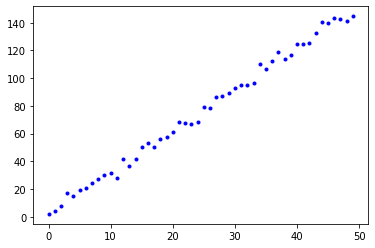

In [8]:
plt.plot(x, y, 'b.')
plt.show()


In [4]:
# 오차(Error)
# 추정된 a, b가 주어진 자료 x와 y를 얼마나 잘 설명하고 있는가?
# 손실(Loss), 비용(Cost)
# 추정된 값(Y_hat)과 실제값(Y)사이의 차이(오차, 잔차)는 작으면 작을수록 자료간의 관계를 잘 설명하고 있다고 판단

In [ ]:
# 오차에 대한 정의
# 1. LAD(Least Absolute Error) : 최소절대오차, L1 loss(L1 norm을 사용하기 때문), manhattan distance사용
# 2. LSE(Least Squared Error)  : 최소제곱오차. L2 loss(L2 norm을 사용하기 때문), euclidean distance사용

In [9]:
# 오차함수
def error(a, b):
    return np.mean(np.square(y - (a*x +b)))

# 기울기함수(편미분)
def grad_fa(a, b):
    return np.mean(-2 * x * (y-(a*x+b)))

# 기울기함수(편미분)
def grad_fb(a, b):
    return np.mean(-2 * (y-(a*x+b)))

In [14]:
beta0, beta1 = 0, 0

lr = 0.001
maxIter = 300
fval = []
beta0_list = []
beta1_list = []

for i in range(maxIter, 0, -1):
    fval.append(error(beta0, beta1))
    grad = np.array([grad_fa(beta0, beta1), grad_fb(beta0, beta1)])
    beta0 = beta0 - lr * grad[0]
    beta1 = beta1 - lr * grad[1]
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    

In [15]:
print(beta0_list)

[4.956136402725924, 1.8907838536928447, 3.786604504175118, 2.6140123828307322, 3.3391885486451978, 2.890622913945414, 3.1679993820178267, 2.996391343647955, 3.1024736601679526, 3.0368085965070835, 3.0773667946085097, 3.0522274926771047, 3.0677211582870036, 3.058083958027344, 3.0639898575174884, 3.0602826060503205, 3.0625209754114535, 3.0610820936203407, 3.0619175657307895, 3.061346411364704, 3.0616452628393254, 3.0614060564701364, 3.0614996589629873, 3.0613874520291406, 3.061402563159544, 3.061338957876552, 3.0613240654658807, 3.061279072770443, 3.061252724556654, 3.0612148728876396, 3.061184163805472, 3.0611490649924864, 3.061116709003543, 3.061082684443828, 3.0610497196819595, 3.0610161272476826, 3.0609829508022735, 3.060949544842252, 3.0609163085877555, 3.0608829951127032, 3.0608497571229756, 3.060816500157956, 3.060783282625888, 3.0607500683878746, 3.060716879781045, 3.060683702975974, 3.0606505465117233, 3.060617405092784, 3.060584281980131, 3.060551175142689, 3.0605180858224443, 

In [16]:
print([np.round(x, 3) for x in beta0_list])

[4.956, 1.891, 3.787, 2.614, 3.339, 2.891, 3.168, 2.996, 3.102, 3.037, 3.077, 3.052, 3.068, 3.058, 3.064, 3.06, 3.063, 3.061, 3.062, 3.061, 3.062, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.061, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.06, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.059, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.058, 3.057, 3.057, 3.057, 3.

In [17]:
print([np.round(x, 3) for x in beta1_list])

[0.151, 0.06, 0.118, 0.084, 0.107, 0.094, 0.104, 0.1, 0.104, 0.103, 0.106, 0.106, 0.108, 0.108, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149, 0.15, 0.151, 0.152, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16, 0.161, 0.162, 0.163, 0.164, 0.166, 0.167, 0.168, 0.169, 0.17, 0.171, 0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.18, 0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189, 0.19, 0.191, 0.192, 0.193, 0.195, 0.196, 0.197, 0.198, 0.199, 0.2, 0.201, 0.202, 0.203, 0.204, 0.205, 0.206, 0.207, 0.208, 0.209, 0.211, 0.212, 0.213, 0.214, 0.215, 0.216, 0.217, 0.218, 0.219, 0.22, 0.221, 0.222, 0.223, 0.224, 0.225, 0.226, 0.227, 0.228, 0.23, 0.231, 0.232, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24, 0.241, 0.242, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 

In [18]:
print(fval)

[7606.369126517478, 2916.3707117787376, 1122.3325499919624, 436.06895697716953, 173.55582648643144, 73.13745795767754, 34.724241958111065, 20.029491459618487, 14.407626247169, 12.256359037544142, 11.432679970413442, 11.11683614270043, 10.995252318184077, 10.947978413354047, 10.929130630546688, 10.92115731088524, 10.917344521174632, 10.915124019402988, 10.913513390317291, 10.912136835607313, 10.910850602559272, 10.909599701491413, 10.908363096721137, 10.907132740789336, 10.905905554546168, 10.904680359340597, 10.903456703508999, 10.902234413478789, 10.901013422054714, 10.899793702734206, 10.898575244581519, 10.897358042616366, 10.89614209413736, 10.894927397315767, 10.893713950657364, 10.892501752796786, 10.891290802418744, 10.890081098227927, 10.888872638937482, 10.8876654232646, 10.886459449928834, 10.885254717651474, 10.884051225155236, 10.882848971164234, 10.88164795440393, 10.880448173601108, 10.879249627483855, 10.878052314781518, 10.876856234224826, 10.875661384545806, 10.8744677

In [19]:
print(beta0)

3.0527870188049038


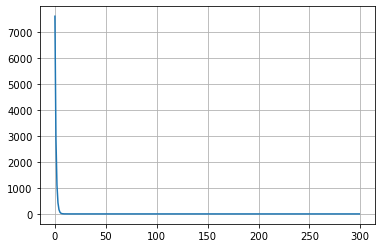

In [20]:
plt.plot(fval)
plt.grid()
plt.show()

In [21]:
beta0

3.0527870188049038

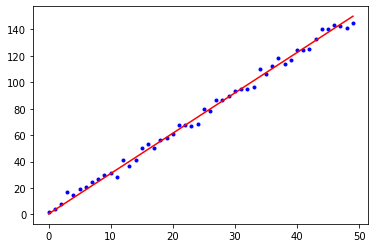

In [25]:
plt.plot(x, y, 'b.')
plt.plot(x, beta0*x + beta1, 'r-')
plt.show()